# Training notebook

### 0. Libraries and dataset

In [1]:
import utils
import model

In [2]:
# set dataset name
dataset_name = 'facades'

### 1. Instantiate dataloaders

In [3]:
# instantiate datasets and dataloaders
datasets = {mode: utils.ImageDataset(dataset_name = dataset_name, transform=utils.data_transforms[mode], mode = mode) for mode in ['train', 'val']}
dataloaders = {mode: utils.DataLoader(datasets[mode], batch_size=1, shuffle=True) for mode in ['train', 'val']}

### 2. Create model

In [4]:
# instantiate model
p2p = model.Pix2Pix().to(utils.device)

### 3. Train

Epoch 1/20
----------


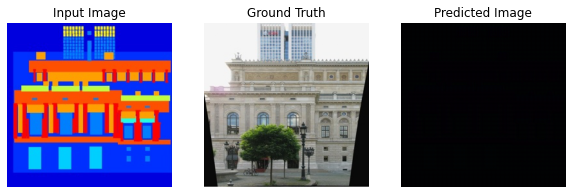

gen_loss: 42.5787, gan_loss: 2.6429, l1_loss: 0.1997, disc_loss: 0.1867.


Epoch 2/20
----------
gen_loss: 39.5675, gan_loss: 3.2382, l1_loss: 0.1816, disc_loss: 0.1452.


Epoch 3/20
----------
gen_loss: 39.8068, gan_loss: 3.1668, l1_loss: 0.1832, disc_loss: 0.1570.


Epoch 4/20
----------
gen_loss: 40.0630, gan_loss: 2.9515, l1_loss: 0.1856, disc_loss: 0.1866.


Epoch 5/20
----------
gen_loss: 39.5634, gan_loss: 2.6624, l1_loss: 0.1845, disc_loss: 0.2415.


Epoch 6/20
----------


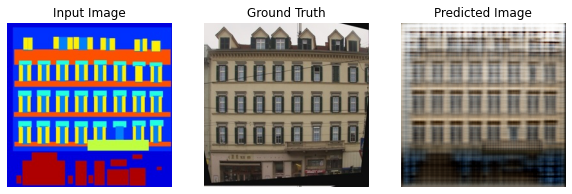

gen_loss: 39.0073, gan_loss: 2.5608, l1_loss: 0.1822, disc_loss: 0.2653.
saving model weights ...


Epoch 7/20
----------
gen_loss: 38.4858, gan_loss: 2.5812, l1_loss: 0.1795, disc_loss: 0.2576.


Epoch 8/20
----------
gen_loss: 37.6988, gan_loss: 2.3169, l1_loss: 0.1769, disc_loss: 0.2985.


Epoch 9/20
----------
gen_loss: 37.2044, gan_loss: 2.4755, l1_loss: 0.1736, disc_loss: 0.2741.


Epoch 10/20
----------
gen_loss: 36.0713, gan_loss: 2.3725, l1_loss: 0.1685, disc_loss: 0.3227.


Epoch 11/20
----------


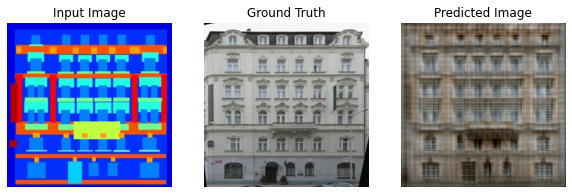

gen_loss: 35.2972, gan_loss: 2.4018, l1_loss: 0.1645, disc_loss: 0.2927.
saving model weights ...


Epoch 12/20
----------
gen_loss: 34.0260, gan_loss: 2.3166, l1_loss: 0.1585, disc_loss: 0.3113.


Epoch 13/20
----------
gen_loss: 32.9373, gan_loss: 2.4308, l1_loss: 0.1525, disc_loss: 0.3034.


Epoch 14/20
----------
gen_loss: 32.0492, gan_loss: 2.4614, l1_loss: 0.1479, disc_loss: 0.2777.


Epoch 15/20
----------
gen_loss: 31.1433, gan_loss: 2.3710, l1_loss: 0.1439, disc_loss: 0.3034.


Epoch 16/20
----------


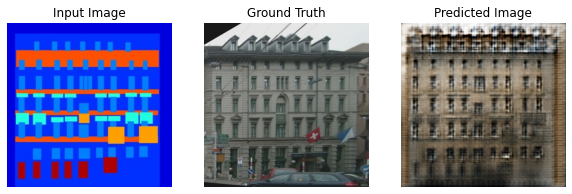

gen_loss: 30.4372, gan_loss: 2.4580, l1_loss: 0.1399, disc_loss: 0.3073.
saving model weights ...


Epoch 17/20
----------
gen_loss: 29.4193, gan_loss: 2.4225, l1_loss: 0.1350, disc_loss: 0.2850.


Epoch 18/20
----------
gen_loss: 28.8481, gan_loss: 2.4354, l1_loss: 0.1321, disc_loss: 0.2978.


Epoch 19/20
----------
gen_loss: 28.1840, gan_loss: 2.3382, l1_loss: 0.1292, disc_loss: 0.3302.


Epoch 20/20
----------
gen_loss: 27.5304, gan_loss: 2.2758, l1_loss: 0.1263, disc_loss: 0.3409.


Training complete in 12m 31s


In [5]:
utils.train(model = p2p, 
            n_epochs = 20, 
            display_step = 5, 
            save_step = 5,
            dataloaders = dataloaders, 
            lr = 2e-4, 
            lbd = 200)